<a href="https://colab.research.google.com/github/AnirudhAchal/WEC-REC-ML-Task/blob/main/WebClub_Rec_ML_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing Data
train_df = pd.read_csv('gdrive/My Drive/wecrec2020/Data/Train_data.csv', index_col = 0)
test_df = pd.read_csv('gdrive/My Drive/wecrec2020/Data/Test_data.csv', index_col = 0)
train_df.drop(['F1', 'F2'], inplace = True, axis = 1) 
test_df.drop(['F1', 'F2'], inplace = True, axis = 1) 

In [ ]:
train_df.head()

,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,O/P
0,1,0,1,14513,0,0,6,8,0,1,0.24,0.907824,0.2879,0.81,0.0,16
1,1,0,1,1790,1,0,6,13,0,1,0.22,0.035276,0.2727,0.80,0.0,40
2,1,0,1,17027,2,0,6,17,0,1,0.22,0.069405,0.2727,0.80,0.0,32
3,1,0,1,16889,3,0,6,17,0,1,0.24,0.835692,0.2879,0.75,0.0,13
4,1,0,1,5041,4,0,6,8,0,1,0.24,0.876817,0.2879,0.75,0.0,1


In [ ]:
test_df.head()

,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17
14000,3,1,8,10317,13,0,6,8,0,1,0.80,-0.652184,0.7424,0.49,0.3582
14001,3,1,8,11213,14,0,6,22,0,1,0.80,0.338563,0.7424,0.49,0.2985
14002,3,1,8,15700,15,0,6,12,0,1,0.80,-1.171582,0.7273,0.46,0.2836
14003,3,1,8,2030,16,0,6,29,0,1,0.80,-0.517499,0.7273,0.46,0.2985
14004,3,1,8,15427,17,0,6,7,0,3,0.74,0.393391,0.6970,0.66,0.3582


In [ ]:
train_df['F2'].value_counts()

In [ ]:
test_df['F2'].value_counts()

In [ ]:
# train_df['F2.0'] = new[0]
# train_df['F2.1'] = new[1]

new = train_df['F2'].str.split("-", expand = True).astype('int64') 

# train_df.drop(['F2'], inplace = True, axis = 1) 
train_df['F2'] = (new[0] // 2012) * 12 + new[1]
train_df.info()

In [ ]:
train_df['F2'].value_counts()

19    744
17    744
5     744
7     744
15    743
10    743
13    741
12    741
8     731
3     730
18    720
6     720
4     719
11    719
16    718
9     717
14    692
1     688
2     649
20    253
Name: F2, dtype: int64

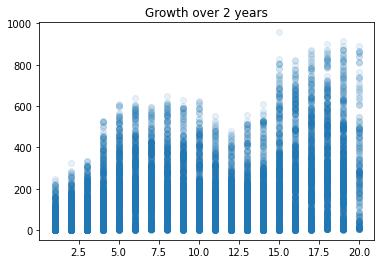

In [ ]:
"""plt.scatter(train_df.loc[train_df['F2.0'] == '2011', 'F2.1'], train_df.loc[train_df['F2.0'] == '2011', 'O/P'], alpha = 0.1)
plt.title('2011')
plt.show()

plt.scatter(train_df.loc[train_df['F2.0'] == '2012', 'F2.1'], train_df.loc[train_df['F2.0'] == '2012', 'O/P'], alpha = 0.1)
plt.title('2012')
plt.show()"""

plt.scatter(train_df['F2'], train_df['O/P'], alpha = 0.1)
plt.title('Growth over 2 years')
plt.show()

In [ ]:
new = test_df['F2'].str.split("-", expand = True).astype('int64')
# test_df['F2.0'] = new[0]
# test_df['F2.1'] = new[1]
  
# test_df.drop(['F2'], inplace = True, axis = 1)
test_df['F2'] = (new[0] // 2012) * 12 + new[1]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 14000 to 17378
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F2      3379 non-null   int64  
 1   F3      3379 non-null   int64  
 2   F4      3379 non-null   int64  
 3   F5      3379 non-null   int64  
 4   F6      3379 non-null   int64  
 5   F7      3379 non-null   int64  
 6   F8      3379 non-null   int64  
 7   F9      3379 non-null   int64  
 8   F10     3379 non-null   int64  
 9   F11     3379 non-null   int64  
 10  F12     3379 non-null   int64  
 11  F13     3379 non-null   float64
 12  F14     3379 non-null   float64
 13  F15     3379 non-null   float64
 14  F16     3379 non-null   float64
 15  F17     3379 non-null   float64
dtypes: float64(5), int64(11)
memory usage: 448.8 KB


In [ ]:
test_df['F2'].value_counts()

24    742
21    720
23    718
22    708
20    491
Name: F2, dtype: int64

# Preprocessing

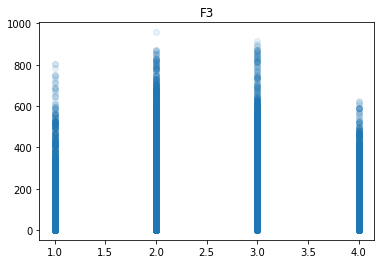

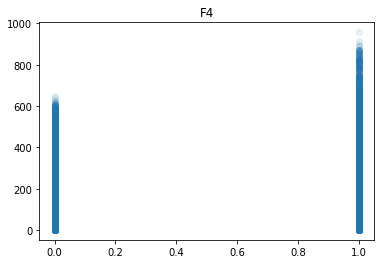

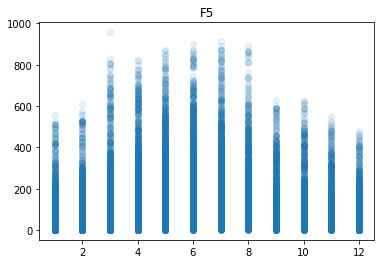

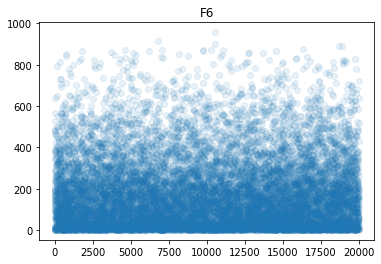

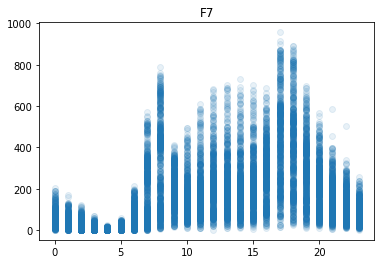

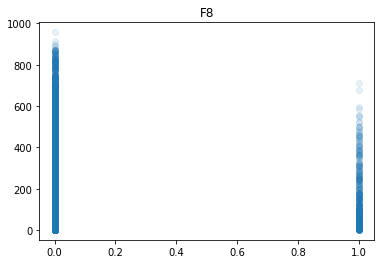

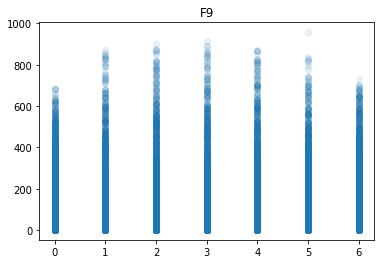

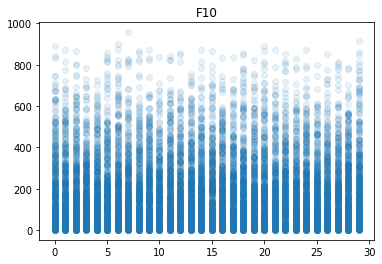

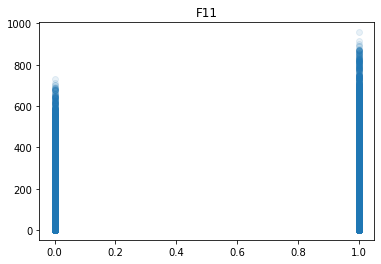

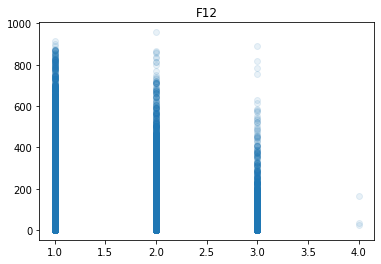

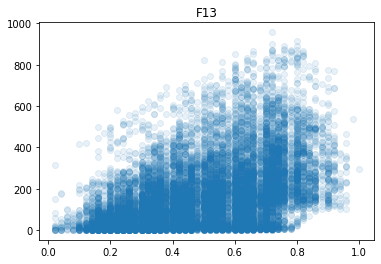

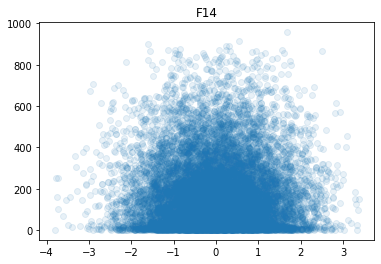

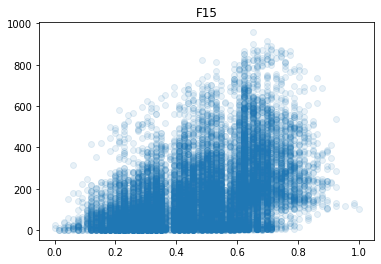

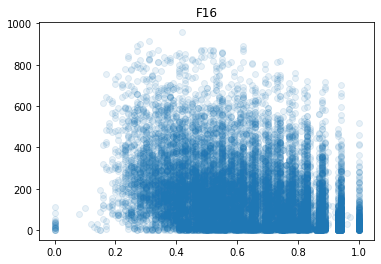

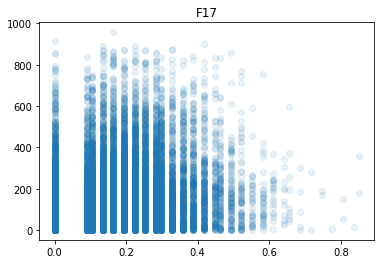

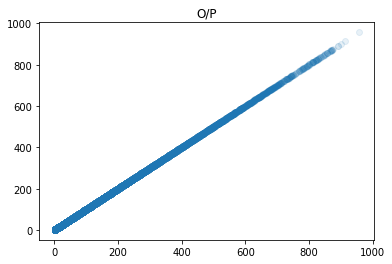

In [ ]:
dummy_columns = ['F3', 'F4', 'F5', 'F7', 'F8', 'F9', 'F11', 'F12']
removed_columns = [] 

for column in train_df.columns:
    if True:
    #if column not in dummy_columns:
        plt.scatter(train_df[column], train_df['O/P'], alpha = 0.1)
        plt.title(column)
        plt.show()

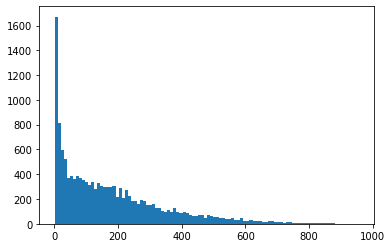

957

In [ ]:
plt.hist(train_df['O/P'], bins = 100)
plt.show()

In [ ]:
def save_files(file1, file2):
    train_df.to_csv('gdrive/My Drive/wecrec2020/Data/' + file1)
    test_df.to_csv('gdrive/My Drive/wecrec2020/Data/' + file2)

In [ ]:
test_df['O/P'] = -1

# Concatinating train_f and test_df to process them simultaneously
df = pd.concat((train_df, test_df), axis = 0)

In [ ]:
df = df.astype('float64') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F3      17379 non-null  float64
 1   F4      17379 non-null  float64
 2   F5      17379 non-null  float64
 3   F6      17379 non-null  float64
 4   F7      17379 non-null  float64
 5   F8      17379 non-null  float64
 6   F9      17379 non-null  float64
 7   F10     17379 non-null  float64
 8   F11     17379 non-null  float64
 9   F12     17379 non-null  float64
 10  F13     17379 non-null  float64
 11  F14     17379 non-null  float64
 12  F15     17379 non-null  float64
 13  F16     17379 non-null  float64
 14  F17     17379 non-null  float64
 15  O/P     17379 non-null  float64
dtypes: float64(16)
memory usage: 2.3 MB


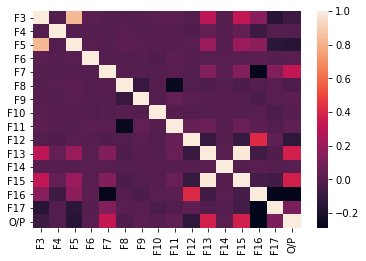

In [ ]:
import seaborn as sns

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            print(i, j)
            correlated_features.add(colname)
            if colname not in removed_columns:
                removed_columns.append(colname)

df.drop(labels=correlated_features, axis=1, inplace=True)

2 0
12 10


{'F5', 'F15'}
['F5', 'F15']


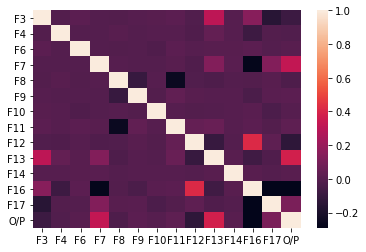

In [ ]:
print(correlated_features)
print(removed_columns)
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
df.describe()

,F3,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F16,F17,O/P
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,1.737900e+04,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,10062.115024,11.546752,0.028770,3.003683,14.530871,0.682721,1.425283,0.496987,-9.624030e-04,0.627229,0.190098,141.124058
std,1.106918,0.500008,5813.483605,6.914405,0.167165,2.005771,8.668902,0.465431,0.639357,0.192556,1.001029e+00,0.192930,0.122340,165.981164
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,-3.814712e+00,0.000000,0.000000,-1.000000
25%,2.000000,0.000000,5007.000000,6.000000,0.000000,1.000000,7.000000,0.000000,1.000000,0.340000,-6.679182e-01,0.480000,0.104500,6.000000
50%,3.000000,1.000000,10163.000000,12.000000,0.000000,3.000000,15.000000,1.000000,1.000000,0.500000,-8.439582e-07,0.630000,0.194000,84.000000
75%,3.000000,1.000000,15113.000000,18.000000,0.000000,5.000000,22.000000,1.000000,2.000000,0.660000,6.742244e-01,0.780000,0.253700,221.000000
max,4.000000,1.000000,19997.000000,23.000000,1.000000,6.000000,29.000000,1.000000,4.000000,1.000000,3.377195e+00,1.000000,0.850700,957.000000


In [ ]:
for column in df.columns:
    if df[column].skew() > 0.5 and column != 'O/P':
        df.drop(labels=column, axis=1, inplace=True)
        print(column)

F8
F12
F17


In [ ]:
"""
for column in df.columns:
    if column not in dummy_columns and column != 'O/P':
        standard_deviation = df[column].std(axis = 0)
        mean = df[column].mean(axis = 0)
        df[column] = (df[column] - mean) / standard_deviation
    if abs(df[column].skew()) > 1 and column != 'O/P' and column not in dummy_columns:
        df[column] = np.log(df[column] + 1)
    if abs(df[column].skew() > 1) and column != 'O/P':
        print(df[column].skew())
        df.drop(column, inplace = True, axis = 1)
        removed_columns.append(column)
"""
"""
for column in df.columns:
    if column not in dummy_columns and column != 'O/P':
        minimum = df[column].min(axis = 0)
        maximum = df[column].max(axis = 0)
        df[column] = (df[column] - minimum) / (maximum - minimum)
    if abs(df[column].skew()) > 1 and column != 'O/P' and column not in dummy_columns:
        df[column] = np.log(df[column] + 1)
    if abs(df[column].skew() > 1) and column != 'O/P':
        print(df[column].skew())
        df.drop(column, inplace = True, axis = 1)
        removed_columns.append(column)
"""


5.6385379928840065
1.2280467231680767


"\nfor column in df.columns:\n    if column not in dummy_columns and column != 'O/P':\n        minimum = df[column].min(axis = 0)\n        maximum = df[column].max(axis = 0)\n        df[column] = (df[column] - minimum) / (maximum - minimum)\n    if abs(df[column].skew()) > 1 and column != 'O/P' and column not in dummy_columns:\n        df[column] = np.log(df[column] + 1)\n    if abs(df[column].skew() > 1) and column != 'O/P':\n        print(df[column].skew())\n        df.drop(column, inplace = True, axis = 1)\n        removed_columns.append(column)\n"

In [ ]:
print(removed_columns)
df.info()

['F5', 'F15']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F3      17379 non-null  float64
 1   F4      17379 non-null  float64
 2   F6      17379 non-null  float64
 3   F7      17379 non-null  float64
 4   F9      17379 non-null  float64
 5   F10     17379 non-null  float64
 6   F11     17379 non-null  float64
 7   F13     17379 non-null  float64
 8   F14     17379 non-null  float64
 9   F16     17379 non-null  float64
 10  O/P     17379 non-null  float64
dtypes: float64(11)
memory usage: 1.6 MB


In [ ]:
df.describe()

,F3,F4,F6,F7,F9,F10,F11,F13,F14,F16,F17,O/P
count,17379.000000,17379.000000,1.737900e+04,17379.000000,17379.000000,1.737900e+04,17379.000000,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04,17379.000000
mean,2.501640,0.502561,7.145316e-17,11.546752,3.003683,2.247405e-17,0.682721,-1.962231e-16,-8.847798e-18,-2.013133e-14,-1.323162e-14,141.124058
std,1.106918,0.500008,1.000000e+00,6.914405,2.005771,1.000000e+00,0.465431,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,165.981164
min,1.000000,0.000000,-1.730652e+00,0.000000,0.000000,-1.676207e+00,0.000000,-2.477133e+00,-3.809830e+00,-3.251072e+00,-1.553844e+00,-1.000000
25%,2.000000,0.000000,-8.695501e-01,6.000000,1.000000,-8.687226e-01,0.000000,-8.152801e-01,-6.662703e-01,-7.631212e-01,-6.996685e-01,6.000000
50%,3.000000,1.000000,1.735362e-02,12.000000,3.000000,5.411636e-02,1.000000,1.564651e-02,9.605708e-04,1.436357e-02,3.189788e-02,84.000000
75%,3.000000,1.000000,8.688224e-01,18.000000,5.000000,8.616004e-01,1.000000,8.465731e-01,6.744929e-01,7.918483e-01,5.198813e-01,221.000000
max,4.000000,1.000000,1.708938e+00,23.000000,6.000000,1.669085e+00,1.000000,2.612292e+00,3.374686e+00,1.932159e+00,5.399715e+00,957.000000


In [ ]:
df.head()

,F3,F4,F6,F7,F9,F10,F11,F13,F14,F16,F17,O/P
0,1.0,0.0,0.765614,0.0,6.0,-0.753368,0.0,-1.334609,0.907853,0.947345,-1.553844,16.0
1,1.0,0.0,-1.422919,1.0,6.0,-0.176593,0.0,-1.438475,0.036201,0.895513,-1.553844,40.0
2,1.0,0.0,1.198057,2.0,6.0,0.284826,0.0,-1.438475,0.070295,0.895513,-1.553844,32.0
3,1.0,0.0,1.174319,3.0,6.0,0.284826,0.0,-1.334609,0.835795,0.636351,-1.553844,13.0
4,1.0,0.0,-0.863702,4.0,6.0,-0.753368,0.0,-1.334609,0.876877,0.636351,-1.553844,1.0


In [ ]:
real_dummies = [column for column in dummy_columns if column not in removed_columns]
print(removed_columns)
print(real_dummies)
df = pd.get_dummies(df, columns = real_dummies)

['F5', 'F15']
['F3', 'F4', 'F7', 'F8', 'F9', 'F11', 'F12']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   F6       17379 non-null  float64
 1   F10      17379 non-null  float64
 2   F13      17379 non-null  float64
 3   F14      17379 non-null  float64
 4   F16      17379 non-null  float64
 5   F17      17379 non-null  float64
 6   O/P      17379 non-null  float64
 7   F3_1.0   17379 non-null  uint8  
 8   F3_2.0   17379 non-null  uint8  
 9   F3_3.0   17379 non-null  uint8  
 10  F3_4.0   17379 non-null  uint8  
 11  F4_0.0   17379 non-null  uint8  
 12  F4_1.0   17379 non-null  uint8  
 13  F7_0.0   17379 non-null  uint8  
 14  F7_1.0   17379 non-null  uint8  
 15  F7_2.0   17379 non-null  uint8  
 16  F7_3.0   17379 non-null  uint8  
 17  F7_4.0   17379 non-null  uint8  
 18  F7_5.0   17379 non-null  uint8  
 19  F7_6.0   17379 non-null  uint8  
 20  F7_7.0   17379 non-null  uint8  
 21  F7_8.0   173

In [ ]:
train_df = df.loc[0:(14000-1), :]
test_df = df.loc[14000:, :]
test_df.drop('O/P', inplace = True, axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 0 to 13999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F3      14000 non-null  float64
 1   F4      14000 non-null  float64
 2   F6      14000 non-null  float64
 3   F7      14000 non-null  float64
 4   F9      14000 non-null  float64
 5   F10     14000 non-null  float64
 6   F11     14000 non-null  float64
 7   F13     14000 non-null  float64
 8   F14     14000 non-null  float64
 9   F16     14000 non-null  float64
 10  O/P     14000 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 14000 to 17378
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F3      3379 non-null   float64
 1   F4      3379 non-null   float64
 2   F6      3379 non-null   float64
 3   F7      3379 non-null   float64
 4   F9      3379 non-null   float64
 5   F10     3379 non-null   float64
 6   F11     3379 non-null   float64
 7   F13     3379 non-null   float64
 8   F14     3379 non-null   float64
 9   F16     3379 non-null   float64
dtypes: float64(10)
memory usage: 290.4 KB


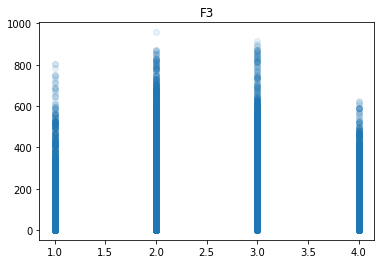

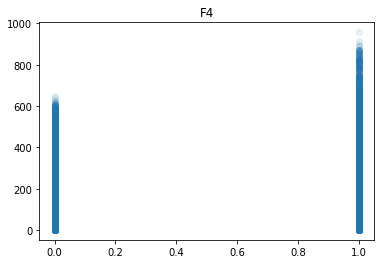

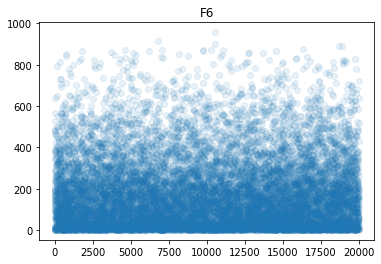

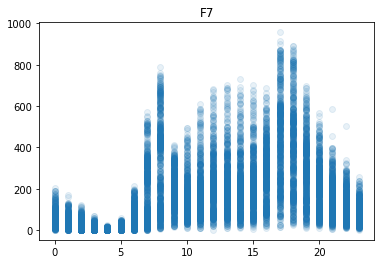

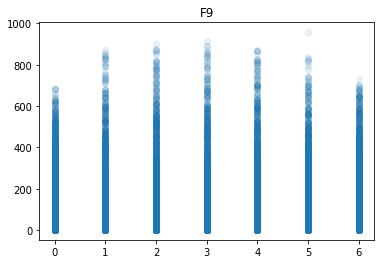

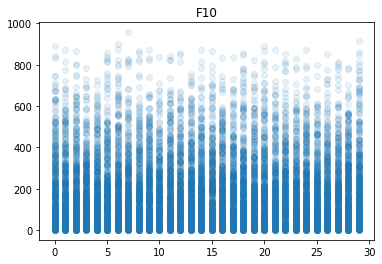

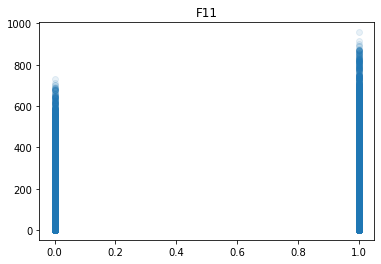

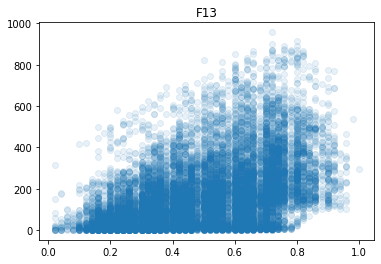

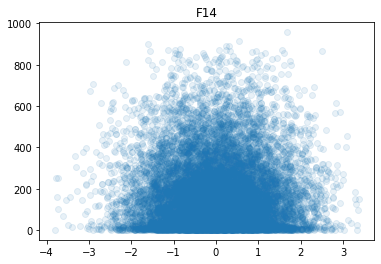

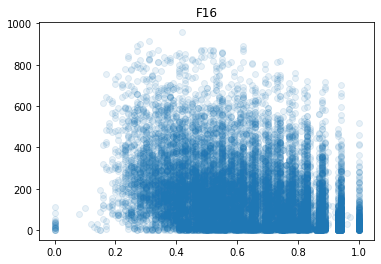

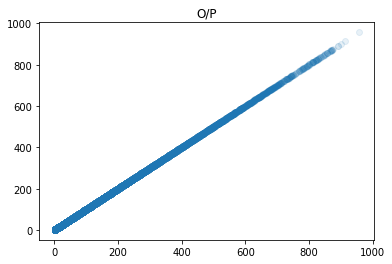

In [ ]:
for column in train_df.columns:
    if True:
    #if column not in dummy_columns:
        plt.scatter(train_df[column], train_df['O/P'], alpha = 0.1)
        plt.title(column)
        plt.show()

In [ ]:
np.power(train_df['O/P'], 1).skew()

1.2848639139352944

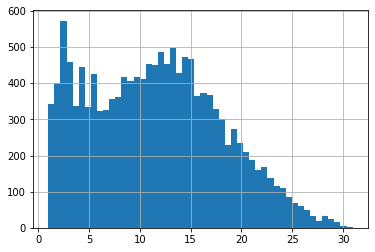

In [ ]:
(train_df['O/P']).hist(bins = 50)

In [ ]:
np.log(train_df['O/P']).skew()

-0.9446062449727428

In [ ]:
train_df['O/P'] = np.power(train_df['O/P'], 1 / 2)
train_df['O/P'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    4.000000
1    6.324555
2    5.656854
3    3.605551
4    1.000000
Name: O/P, dtype: float64

In [ ]:
save_files('Train_data_def_4.csv', 'Test_data_def_4.csv')